-----------
Initializing structure...
time for choose_chunkdivision = 0.000216961 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     ellipsoid, center = (0,0,0)
          size (10,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (1,0,0)
          radius 0.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (-1,0,0)
          radius 0.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
time for set_epsilon = 0.224009 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 192.675/20000.0 = 1.0% done in 4.0s, 411.2s to go
on time step 7717 (time=192.925), 0.000518434 s/step
Meep progress: 390.875/20000.0 = 2.0% done in 8.0s, 401.4s to go
on time step 15652 (time=391.3), 0.000504097 s/step
Meep progress: 675.6/20000.0 = 3.4% done in 12.0s, 343.2s to go
on time step 27046 (time=676.15), 0.000351092 s/step
Meep progress: 953.125/20000.0 = 4.8% done in 16.0s, 319.7s to go
on time step 38152 (time=953.8), 0.00036018 s/step
Meep progress: 1230.4750000000001/20000.0 = 6.2% done in 20.0s, 305.1s to go
on time step 49249 (time=1231.23), 0.000360474 s/step
Meep progress: 1521.325/20000.0 = 7.6% done in 24.0s, 291.5s to go
on time step 60890 (time=1522.25), 0.00034363 s/step
Meep progress: 1812.125/20000.0 = 9.1% done in 28.0s, 281.0s to go
on time step 72523 (time=1813.08), 0.000343852 s/step
Meep progress: 2088.8250000000003/20000.0 = 10.4% done in 32.0s, 274.4s to go
on time step 83594 (time=2089.85), 0.000361318 s/step
Meep progress: 2364.4500000

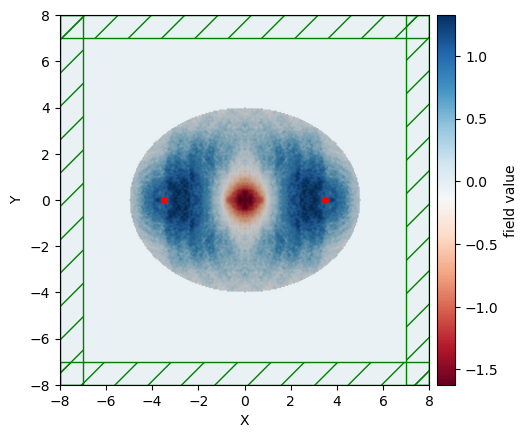

In [21]:
##三介電圓柱
import meep as mp
import math
import matplotlib.pyplot as plt

# 計算區域大小
cell = mp.Vector3(16, 16, 0)

# 邊界層（PML 吸收層）
pml_layers = [mp.PML(1.0)]

# 解析度
resolution = 20

# 橢圓尺寸
a = 5
b = 4

# 完美導體背景
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 空氣橢圓區域
air_ellipse = mp.Ellipsoid(
    size=mp.Vector3(a*2, b*2, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

# 雜質區域區域(三介電圓柱)
cylinder_1 = mp.Cylinder(
    radius=0.5,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(0, 0)        
)
cylinder_2 = mp.Cylinder(
    radius=0.5,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(1, 0)        
)
cylinder_3 = mp.Cylinder(
    radius=0.5,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(-1, 0)        
)

# 幾何結構
geometry = [metal_block, air_ellipse, cylinder_1, cylinder_2, cylinder_3]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    resolution=resolution,
    dimensions=2
)

#計算焦點位置
f = math.sqrt(a**2 - b**2)
right_focus_point = mp.Vector3(f+0.5, 0)
left_focus_point = mp.Vector3(-f-0.5, 0)

# 建立點波源
sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=right_focus_point
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=left_focus_point
    )
]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)

# 執行模擬
sim.run(until=20000)

# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000200987 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     ellipsoid, center = (0,0,0)
          size (10,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (2,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (1,0,0)
          radius 0.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (-1,0,0)
          radius 0.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
time for set_epsilon = 0.167484 s
-----------

FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 275.975/20000.0 = 1.4% done in 4.0s, 285.9s to go
on time step 11049 (time=276.225), 0.000362046 s/step
Meep progress: 555.475/20000.0 = 2.8% done in 8.0s, 280.1s to go
on time step 22233 (time=555.825), 0.0003577 s/step
Meep progress: 833.1750000000001/20000.0 = 4.2% done in 12.0s, 276.1s to go
on time step 33345 (time=833.625), 0.000360003 s/step
Meep progress: 1114.9/20000.0 = 5.6% done in 16.0s, 271.0s to go
on time step 44619 (time=1115.48), 0.000354817 s/step
Meep progress: 1406.45/20000.0 = 7.0% done in 20.0s, 264.4s to go
on time step 56285 (time=1407.12), 0.000342886 s/step
Meep progress: 1698.2/20000.0 = 8.5% done in 24.0s, 258.7s to go
on time step 67961 (time=1699.03), 0.000342609 s/step
Meep progress: 1980.275/20000.0 = 9.9% done in 28.0s, 254.8s to go
on time step 79247 (time=1981.18), 0.000354427 s/step
Meep progress: 2258.15/20000.0 = 11.3% done in 32.0s, 251.4s to go
on time step 90366 (time=2259.15), 0.000359762 s/step
Meep progress: 2540.2250000000004/

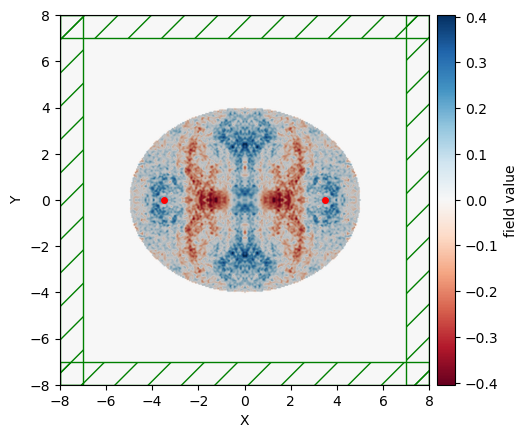

In [22]:
##長方兩圓介電
import meep as mp
import math
import matplotlib.pyplot as plt

# 計算區域大小
cell = mp.Vector3(16, 16, 0)

# 邊界層（PML 吸收層）
pml_layers = [mp.PML(1.0)]

# 解析度
resolution = 20

# 橢圓尺寸
a = 5
b = 4

# 完美導體背景
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 空氣橢圓區域
air_ellipse = mp.Ellipsoid(
    size=mp.Vector3(a*2, b*2, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

# 雜質區域(長方兩圓介電)
block = mp.Block(
    size=mp.Vector3(2, 1, mp.inf),
    material=mp.Medium(index=2.5),
    center=mp.Vector3(0, 0),
)        
cylinder_1 = mp.Cylinder(
    radius=0.5,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(1, 0)        
)
cylinder_2 = mp.Cylinder(
    radius=0.5,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(-1, 0)        
)

# 幾何結構
geometry = [metal_block, air_ellipse, block, cylinder_1, cylinder_2]

# 建立模擬物件
sim.reset_meep()
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    resolution=resolution,
    dimensions=2
)

#計算焦點位置
f = math.sqrt(a**2 - b**2)
right_focus_point = mp.Vector3(f+0.5, 0)
left_focus_point = mp.Vector3(-f-0.5, 0)

# 建立點波源
sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=right_focus_point
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=left_focus_point
    )
]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)

# 執行模擬
sim.run(until=20000)

# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000185966 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     ellipsoid, center = (0,0,0)
          size (10,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (2,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     block, center = (0,0,0)
          size (1,2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
time for set_epsilon = 0.129783 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 274.375/20000.0 = 1.4% done in 4.0s, 287.6s to go
on time step 10985 (time=274.625), 0.000364143 s/step
Meep progress: 559.1/20000.0 = 2.8% done in 8.0s, 278.2s to go
on time step 22378 (time=559.45), 0.000351112 s/step
Meep progress: 843.5500000000001/20000.0 = 4.2% done in 12.0s, 272.5s to go
on time step 33758 (time=843.95), 0.000351516 s/step
Meep progress: 1127.3500000000001/20000.0 = 5.6% done in 16.0s, 267.9s to go
on time step 45114 (time=1127.85), 0.000352253 s/step
Meep progress: 1407.275/20000.0 = 7.0% done in 20.0s, 264.3s to go
on time step 56316 (time=1407.9), 0.000357102 s/step
Meep progress: 1684.6750000000002/20000.0 = 8.4% done in 24.0s, 260.9s to go
on time step 67416 (time=1685.4), 0.000360389 s/step
Meep progress: 1960.825/20000.0 = 9.8% done in 28.0s, 257.6s to go
on time step 78465 (time=1961.62), 0.000362048 s/step
Meep progress: 2238.725/20000.0 = 11.2% done in 32.0s, 253.9s to go
on time step 89586 (time=2239.65), 0.000359701 s/step
Meep progres

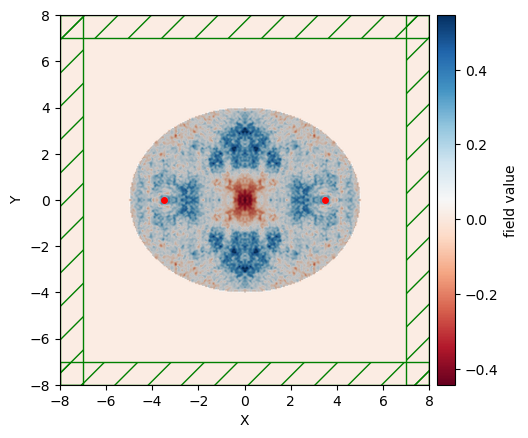

In [23]:
##十字
import meep as mp
import math
import matplotlib.pyplot as plt

# 計算區域大小
cell = mp.Vector3(16, 16, 0)

# 邊界層（PML 吸收層）
pml_layers = [mp.PML(1.0)]

# 解析度
resolution = 20

# 橢圓尺寸
a = 5
b = 4

# 完美導體背景
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 空氣橢圓區域
air_ellipse = mp.Ellipsoid(
    size=mp.Vector3(a*2, b*2, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

# 雜質區域區域(三介電圓柱)
block_h = mp.Block(
    size=mp.Vector3(2, 1, mp.inf),
    material=mp.Medium(index=2.5),
    center=mp.Vector3(0, 0),
)
block_v = mp.Block(
    size=mp.Vector3(1, 2, mp.inf),
    material=mp.Medium(index=2.5),
    center=mp.Vector3(0, 0),
) 

# 幾何結構
geometry = [metal_block, air_ellipse, block_h, block_v]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    resolution=resolution,
    dimensions=2
)

#計算焦點位置
f = math.sqrt(a**2 - b**2)
right_focus_point = mp.Vector3(f+0.5, 0)
left_focus_point = mp.Vector3(-f-0.5, 0)

# 建立點波源
sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=right_focus_point
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=left_focus_point
    )
]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)

# 執行模擬
sim.run(until=20000)

# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000324011 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     ellipsoid, center = (0,0,0)
          size (10,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-0.5,-0.5,0)
          radius 0.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (-0.5,0.5,0)
          radius 0.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (0.5,0.5,0)
          radius 0.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (0.5,-0.5,0)
        

FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 205.60000000000002/20000.0 = 1.0% done in 4.0s, 385.1s to go
on time step 8231 (time=205.775), 0.000485983 s/step
Meep progress: 434.1/20000.0 = 2.2% done in 8.0s, 360.6s to go
on time step 17380 (time=434.5), 0.000437238 s/step
Meep progress: 750.7/20000.0 = 3.8% done in 12.0s, 307.7s to go
on time step 30046 (time=751.15), 0.00031582 s/step
Meep progress: 1068.15/20000.0 = 5.3% done in 16.0s, 283.6s to go
on time step 42750 (time=1068.75), 0.000314878 s/step
Meep progress: 1384.6000000000001/20000.0 = 6.9% done in 20.0s, 268.9s to go
on time step 55415 (time=1385.38), 0.000315855 s/step
Meep progress: 1702.075/20000.0 = 8.5% done in 24.0s, 258.0s to go
on time step 68119 (time=1702.98), 0.000314885 s/step
Meep progress: 2019.8500000000001/20000.0 = 10.1% done in 28.0s, 249.3s to go
on time step 80834 (time=2020.85), 0.0003146 s/step
Meep progress: 2337.225/20000.0 = 11.7% done in 32.0s, 241.8s to go
on time step 93534 (time=2338.35), 0.000314978 s/step
Meep progress: 2

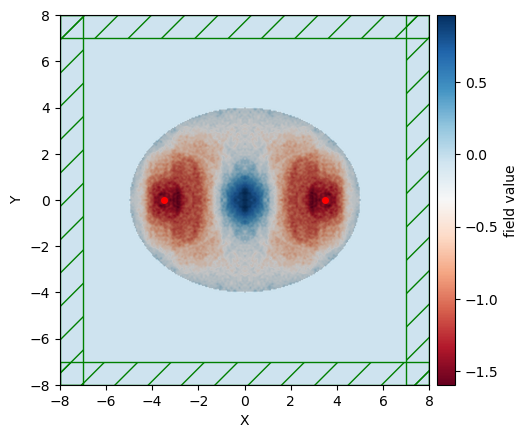

In [24]:
##四圓
import meep as mp
import math
import matplotlib.pyplot as plt

# 計算區域大小
cell = mp.Vector3(16, 16, 0)

# 邊界層（PML 吸收層）
pml_layers = [mp.PML(1.0)]

# 解析度
resolution = 20

# 橢圓尺寸
a = 5
b = 4

# 完美導體背景
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 空氣橢圓區域
air_ellipse = mp.Ellipsoid(
    size=mp.Vector3(a*2, b*2, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

# 雜質區域區域(三介電圓柱)
cylinder_1 = mp.Cylinder(
    radius=0.5,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(-0.5, -0.5)        
)
cylinder_2 = mp.Cylinder(
    radius=0.5,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(-0.5, 0.5)        
)
cylinder_3 = mp.Cylinder(
    radius=0.5,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(0.5, 0.5)        
)
cylinder_4 = mp.Cylinder(
    radius=0.5,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(0.5, -0.5)        
)

# 幾何結構
geometry = [metal_block, air_ellipse, cylinder_1, cylinder_2, cylinder_3, cylinder_4]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    resolution=resolution,
    dimensions=2
)

#計算焦點位置
f = math.sqrt(a**2 - b**2)
right_focus_point = mp.Vector3(f+0.5, 0)
left_focus_point = mp.Vector3(-f-0.5, 0)

# 建立點波源
sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=right_focus_point
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=left_focus_point
    )
]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)

# 執行模擬
sim.run(until=20000)

# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000212193 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     ellipsoid, center = (0,0,0)
          size (10,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (0,0,0)
          radius 0.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (25,25,25)
time for set_epsilon = 0.145484 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 316.15000000000003/20000.0 = 1.6% done in 4.0s, 249.1s to go
on time step 12657 (time=316.425), 0.000316046 s/step
Meep progress: 634.0500000000001/20000.0 = 3.2% done in 8.0s, 244.4s to go
on time step 25378 (time=634.45), 0.000314464 s/step
Meep progress: 952.4000000000001/20000.0 = 4.8% done in 12.0s, 240.0s to go
on time step 38115 (time=952.875), 0.000314056 s/step
Meep progress: 1270.025/20000.0 = 6.4% done in 16.0s, 236.0s to go
on time step 50825 (time=1270.62), 0.000314737 s/step
Meep progress: 1586.7250000000001/20000.0 = 7.9% done in 20.0s, 232.1s to go
on time step 63497 (time=1587.43), 0.000315658 s/step
Meep progress: 1904.25/20000.0 = 9.5% done in 24.0s, 228.1s to go
on time step 76203 (time=1905.08), 0.000314846 s/step
Meep progress: 2222.5750000000003/20000.0 = 11.1% done in 28.0s, 224.0s to go
on time step 88942 (time=2223.55), 0.000313997 s/step
Meep progress: 2540.775/20000.0 = 12.7% done in 32.0s, 219.9s to go
on time step 101673 (time=2541.83), 0.00

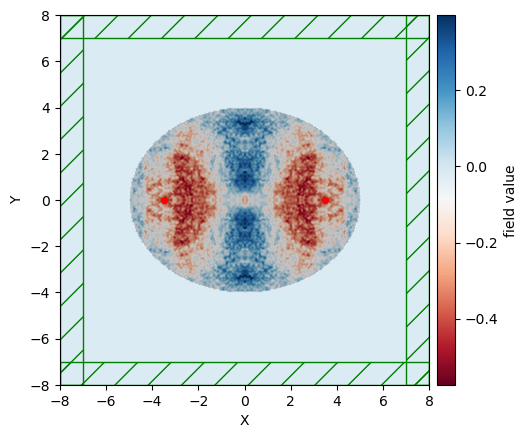

In [25]:
##重疊圓
import meep as mp
import math
import matplotlib.pyplot as plt

# 計算區域大小
cell = mp.Vector3(16, 16, 0)

# 邊界層（PML 吸收層）
pml_layers = [mp.PML(1.0)]

# 解析度
resolution = 20

# 橢圓尺寸
a = 5
b = 4

# 完美導體背景
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 空氣橢圓區域
air_ellipse = mp.Ellipsoid(
    size=mp.Vector3(a*2, b*2, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

# 雜質區域區域(三介電圓柱)
cylinder_1 = mp.Cylinder(
    radius=1,                    
    height=mp.inf,                 
    material=mp.Medium(index=2.5),
    center=mp.Vector3(0, 0)        
)
cylinder_2 = mp.Cylinder(
    radius=0.5,                    
    height=mp.inf,                 
    material=mp.Medium(index=5),
    center=mp.Vector3(0, 0)        
)

# 幾何結構
geometry = [metal_block, air_ellipse, cylinder_1, cylinder_2]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    resolution=resolution,
    dimensions=2
)

#計算焦點位置
f = math.sqrt(a**2 - b**2)
right_focus_point = mp.Vector3(f+0.5, 0)
left_focus_point = mp.Vector3(-f-0.5, 0)

# 建立點波源
sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=right_focus_point
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=left_focus_point
    )
]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)

# 執行模擬
sim.run(until=20000)

# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000201941 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     ellipsoid, center = (0,0,0)
          size (10,5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     ellipsoid, center = (0,0,0)
          size (8,4,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
time for set_epsilon = 0.257242 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 199.82500000000002/20000.0 = 1.0% done in 4.0s, 396.4s to go
on time step 8002 (time=200.05), 0.000499926 s/step
Meep progress: 403.8/20000.0 = 2.0% done in 8.0s, 388.3s to go
on time step 16164 (time=404.1), 0.000490088 s/step
Meep progress: 717.625/20000.0 = 3.6% done in 12.0s, 322.5s to go
on time step 28729 (time=718.225), 0.000318366 s/step
Meep progress: 1033.45/20000.0 = 5.2% done in 16.0s, 293.7s to go
on time step 41367 (time=1034.17), 0.000316514 s/step
Meep progress: 1347.3000000000002/20000.0 = 6.7% done in 20.0s, 276.9s to go
on time step 53925 (time=1348.12), 0.000318534 s/step
Meep progress: 1658.15/20000.0 = 8.3% done in 24.0s, 265.5s to go
on time step 66363 (time=1659.08), 0.000321606 s/step
Meep progress: 1972.5/20000.0 = 9.9% done in 28.0s, 255.9s to go
on time step 78944 (time=1973.6), 0.000317965 s/step
Meep progress: 2287.1/20000.0 = 11.4% done in 32.0s, 247.8s to go
on time step 91533 (time=2288.33), 0.000317747 s/step
Meep progress: 2601.15/20000

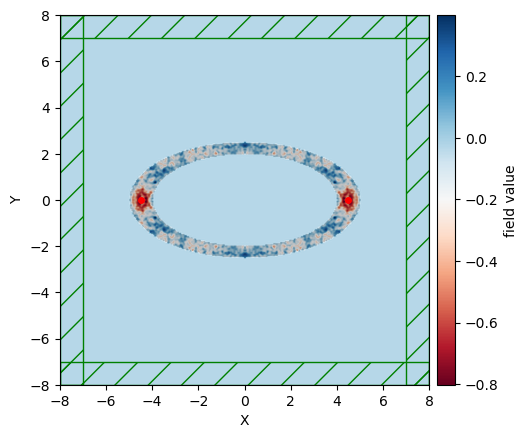

In [24]:
import meep as mp
import matplotlib.pyplot as plt
import math

# 設定計算區域大小 (x, y)
cell = mp.Vector3(16, 16, 0)

# 設定邊界及其厚度
pml_layers = [mp.PML(1.0)]

# 設定解析度
resolution = 20

# 完美導體區域
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 外層橢圓 (介質殼)
outer_ellipse = mp.Ellipsoid(
    size=mp.Vector3(10, 5, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

# 內層橢圓 (完美反射層)
inner_ellipse = mp.Ellipsoid(
  size=mp.Vector3(8, 4, mp.inf),
    material=mp.metal,
    center=mp.Vector3(0, 0)
)

# 幾何放入模擬
geometry = [metal_block, outer_ellipse, inner_ellipse]

focus_point = mp.Vector3(-4.5, 0)

# 建立點波源
sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=right_focus
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=left_focus
    )
]

# 建立模擬物件
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)

# 執行模擬
sim.run(until=20000)

# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000187874 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     ellipsoid, center = (0,0,0)
          size (10,6,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.124101 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 320.35/20000.0 = 1.6% done in 4.0s, 245.7s to go
on time step 12825 (time=320.625), 0.000311912 s/step
Meep progress: 637.375/20000.0 = 3.2% done in 8.0s, 243.0s to go
on time step 25512 (time=637.8), 0.000315289 s/step
Meep progress: 960.35/20000.0 = 4.8% done in 12.0s, 237.9s to go
on time step 38436 (time=960.9), 0.000309502 s/step
Meep progress: 1280.375/20000.0 = 6.4% done in 16.0s, 233.9s to go
on time step 51242 (time=1281.05), 0.000312378 s/step
Meep progress: 1601.575/20000.0 = 8.0% done in 20.0s, 229.8s to go
on time step 64094 (time=1602.35), 0.000311243 s/step
Meep progress: 1919.1000000000001/20000.0 = 9.6% done in 24.0s, 226.1s to go
on time step 76801 (time=1920.03), 0.000314808 s/step
Meep progress: 2240.725/20000.0 = 11.2% done in 28.0s, 221.9s to go
on time step 89670 (time=2241.75), 0.000310827 s/step
Meep progress: 2560.8250000000003/20000.0 = 12.8% done in 32.0s, 217.9s to go
on time step 102480 (time=2562), 0.00031226 s/step
Meep progress: 2883.425/

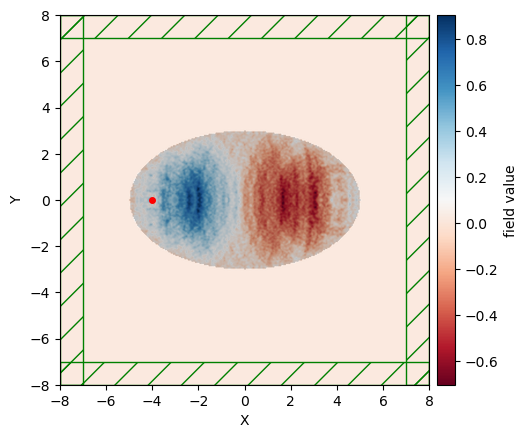

In [3]:
# 左焦點；點波源；5/3；無旋轉
import meep as mp
import matplotlib.pyplot as plt
import math

# 設定計算區域大小 (x, y)
cell = mp.Vector3(16, 16, 0)

# 設定邊界及其厚度
pml_layers = [mp.PML(1.0)]

# 設定解析度
resolution = 20

# 橢圓尺寸
a = 5
b = 3

# 完美導體區域
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 空氣橢圓覆蓋金屬
air_ellipse = mp.Ellipsoid(
    size=mp.Vector3(a*2, b*2, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

geometry = [metal_block, air_ellipse]

# 計算橢圓左焦點位置
f = math.sqrt(a**2 - b**2)
focus_point = mp.Vector3(-f, 0)

# 建立點波源
sources = [mp.Source(
    src=mp.ContinuousSource(frequency=0.15),
    component=mp.Ez,
    center=focus_point
)]

# 建立模擬物件
sim.reset_meep()
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)

# 執行模擬
sim.run(until=20000)
# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000298977 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     ellipsoid, center = (0,0,0)
          size (10,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.164644 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 301.3/20000.0 = 1.5% done in 4.0s, 261.5s to go
on time step 12066 (time=301.65), 0.000331524 s/step
Meep progress: 604.875/20000.0 = 3.0% done in 8.0s, 256.5s to go
on time step 24213 (time=605.325), 0.000329321 s/step
Meep progress: 908.225/20000.0 = 4.5% done in 12.0s, 252.3s to go
on time step 36350 (time=908.75), 0.000329577 s/step
Meep progress: 1211.9/20000.0 = 6.1% done in 16.0s, 248.1s to go
on time step 48504 (time=1212.6), 0.000329117 s/step
Meep progress: 1517.9250000000002/20000.0 = 7.6% done in 20.0s, 243.5s to go
on time step 60750 (time=1518.75), 0.000326685 s/step
Meep progress: 1821.525/20000.0 = 9.1% done in 24.0s, 239.5s to go
on time step 72899 (time=1822.48), 0.000329249 s/step
Meep progress: 2125.125/20000.0 = 10.6% done in 28.0s, 235.5s to go
on time step 85048 (time=2126.2), 0.000329261 s/step
Meep progress: 2428.9/20000.0 = 12.1% done in 32.0s, 231.5s to go
on time step 97204 (time=2430.1), 0.000329061 s/step
Meep progress: 2732.5750000000003/20

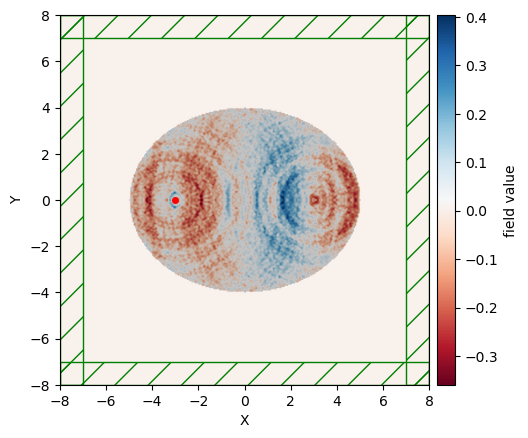

In [4]:
#左焦點；點波源；5/4；無旋轉
import meep as mp
import matplotlib.pyplot as plt
import math

# 設定計算區域大小 (x, y)
cell = mp.Vector3(16, 16, 0)

# 設定邊界及其厚度
pml_layers = [mp.PML(1.0)]

# 設定解析度
resolution = 20

# 橢圓尺寸
a = 5
b = 4

# 完美導體區域
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 空氣橢圓覆蓋金屬
air_ellipse = mp.Ellipsoid(
    size=mp.Vector3(a*2, b*2, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

geometry = [metal_block, air_ellipse]

# 計算橢圓左焦點位置
f = math.sqrt(a**2 - b**2)
focus_point = mp.Vector3(-f, 0)

# 建立點波源
sources = [mp.Source(
    src=mp.ContinuousSource(frequency=0.15),
    component=mp.Ez,
    center=focus_point
)]

# 建立模擬物件
sim.reset_meep()
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)

# 執行模擬
sim.run(until=20000)
# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000200987 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     ellipsoid, center = (0,0,0)
          size (12,6,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.125042 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 315.425/20000.0 = 1.6% done in 4.0s, 249.6s to go
on time step 12628 (time=315.7), 0.000316759 s/step
Meep progress: 623.975/20000.0 = 3.1% done in 8.0s, 248.4s to go
on time step 24975 (time=624.375), 0.000324013 s/step
Meep progress: 935.4000000000001/20000.0 = 4.7% done in 12.0s, 244.6s to go
on time step 37437 (time=935.925), 0.000320999 s/step
Meep progress: 1252.1750000000002/20000.0 = 6.3% done in 16.0s, 239.6s to go
on time step 50115 (time=1252.88), 0.000315528 s/step
Meep progress: 1564.025/20000.0 = 7.8% done in 20.0s, 235.8s to go
on time step 62593 (time=1564.83), 0.000320623 s/step
Meep progress: 1874.15/20000.0 = 9.4% done in 24.0s, 232.1s to go
on time step 75003 (time=1875.08), 0.000322331 s/step
Meep progress: 2189.85/20000.0 = 10.9% done in 28.0s, 227.7s to go
on time step 87637 (time=2190.93), 0.000316607 s/step
Meep progress: 2505.7250000000004/20000.0 = 12.5% done in 32.0s, 223.4s to go
on time step 100277 (time=2506.93), 0.000316464 s/step
Meep pro

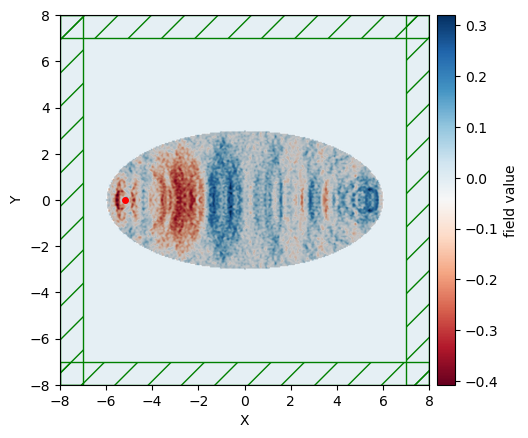

In [5]:
#左焦點；點波源；6/3；無旋轉
import meep as mp
import matplotlib.pyplot as plt
import math

# 設定計算區域大小 (x, y)
cell = mp.Vector3(16, 16, 0)

# 設定邊界及其厚度
pml_layers = [mp.PML(1.0)]

# 設定解析度
resolution = 20

# 橢圓尺寸
a = 6
b = 3

# 完美導體區域
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 空氣橢圓覆蓋金屬
air_ellipse = mp.Ellipsoid(
    size=mp.Vector3(a*2, b*2, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

geometry = [metal_block, air_ellipse]

# 計算橢圓右焦點位置
f = math.sqrt(a**2 - b**2)
focus_point = mp.Vector3(-f, 0)

# 建立點波源
sources = [mp.Source(
    src=mp.ContinuousSource(frequency=0.15),
    component=mp.Ez,
    center=focus_point
)]

# 建立模擬物件
sim.reset_meep()
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)
# 執行模擬
sim.run(until=20000)
# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000183105 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     ellipsoid, center = (0,0,0)
          size (12,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.126726 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 313.1/20000.0 = 1.6% done in 4.0s, 251.5s to go
on time step 12534 (time=313.35), 0.000319134 s/step
Meep progress: 621.375/20000.0 = 3.1% done in 8.0s, 249.5s to go
on time step 24870 (time=621.75), 0.000324254 s/step
Meep progress: 925.6500000000001/20000.0 = 4.6% done in 12.0s, 247.3s to go
on time step 37042 (time=926.05), 0.000328627 s/step
Meep progress: 1230.8000000000002/20000.0 = 6.2% done in 16.0s, 244.0s to go
on time step 49254 (time=1231.35), 0.00032757 s/step
Meep progress: 1537.15/20000.0 = 7.7% done in 20.0s, 240.2s to go
on time step 61513 (time=1537.83), 0.0003263 s/step
Meep progress: 1842.4250000000002/20000.0 = 9.2% done in 24.0s, 236.5s to go
on time step 73730 (time=1843.25), 0.000327442 s/step
Meep progress: 2147.975/20000.0 = 10.7% done in 28.0s, 232.7s to go
on time step 85958 (time=2148.95), 0.000327129 s/step
Meep progress: 2454.65/20000.0 = 12.3% done in 32.0s, 228.7s to go
on time step 98230 (time=2455.75), 0.000325966 s/step
Meep progress: 

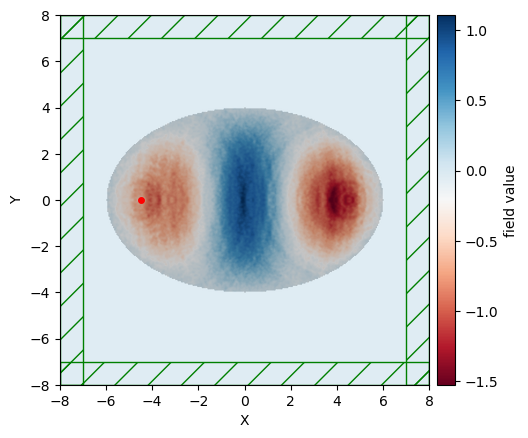

In [6]:
#左焦點；點波源；6/4；無旋轉
import meep as mp
import matplotlib.pyplot as plt
import math

# 設定計算區域大小 (x, y)
cell = mp.Vector3(16, 16, 0)

# 設定邊界及其厚度
pml_layers = [mp.PML(1.0)]

# 設定解析度
resolution = 20

# 橢圓尺寸
a = 6
b = 4

# 完美導體區域
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 空氣橢圓覆蓋金屬
air_ellipse = mp.Ellipsoid(
    size=mp.Vector3(a*2, b*2, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

geometry = [metal_block, air_ellipse]

# 計算橢圓右焦點位置
f = math.sqrt(a**2 - b**2)
focus_point = mp.Vector3(-f, 0)

# 建立點波源
sources = [mp.Source(
    src=mp.ContinuousSource(frequency=0.15),
    component=mp.Ez,
    center=focus_point
)]

# 建立模擬物件
sim.reset_meep()
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)
# 執行模擬
sim.run(until=20000)
# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000207901 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     ellipsoid, center = (0,0,0)
          size (10,6,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.136776 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 301.7/20000.0 = 1.5% done in 4.0s, 261.2s to go
on time step 12081 (time=302.025), 0.000331125 s/step
Meep progress: 609.225/20000.0 = 3.0% done in 8.0s, 254.6s to go
on time step 24386 (time=609.65), 0.000325087 s/step
Meep progress: 912.5500000000001/20000.0 = 4.6% done in 12.0s, 251.0s to go
on time step 36525 (time=913.125), 0.000329538 s/step
Meep progress: 1215.95/20000.0 = 6.1% done in 16.0s, 247.2s to go
on time step 48666 (time=1216.65), 0.000329467 s/step
Meep progress: 1519.25/20000.0 = 7.6% done in 20.0s, 243.3s to go
on time step 60802 (time=1520.05), 0.000329602 s/step
Meep progress: 1827.025/20000.0 = 9.1% done in 24.0s, 238.7s to go
on time step 73121 (time=1828.03), 0.000324713 s/step
Meep progress: 2134.65/20000.0 = 10.7% done in 28.0s, 234.3s to go
on time step 85430 (time=2135.75), 0.00032497 s/step
Meep progress: 2442.225/20000.0 = 12.2% done in 32.0s, 230.1s to go
on time step 97740 (time=2443.5), 0.000324964 s/step
Meep progress: 2746.275/20000.0 =

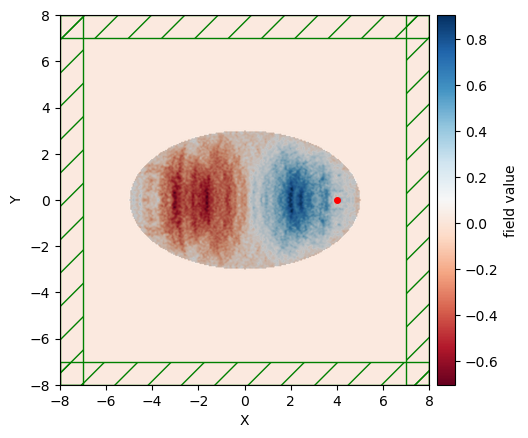

In [7]:
#右焦點；點波源；5/3；無旋轉
import meep as mp
import matplotlib.pyplot as plt
import math

# 設定計算區域大小 (x, y)
cell = mp.Vector3(16, 16, 0)

# 設定邊界及其厚度
pml_layers = [mp.PML(1.0)]

# 設定解析度
resolution = 20

# 橢圓尺寸
a = 5
b = 3

# 完美導體區域
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 空氣橢圓覆蓋金屬
air_ellipse = mp.Ellipsoid(
    size=mp.Vector3(a*2, b*2, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

geometry = [metal_block, air_ellipse]

# 計算橢圓右焦點位置
f = math.sqrt(a**2 - b**2)
focus_point = mp.Vector3(f, 0)

# 建立點波源
sources = [mp.Source(
    src=mp.ContinuousSource(frequency=0.15),
    component=mp.Ez,
    center=focus_point
)]

# 建立模擬物件
sim.reset_meep()
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)
# 執行模擬
sim.run(until=20000)
# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000209093 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     ellipsoid, center = (0,0,0)
          size (10,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.142006 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 299.8/20000.0 = 1.5% done in 4.0s, 262.9s to go
on time step 12001 (time=300.025), 0.000333312 s/step
Meep progress: 600.75/20000.0 = 3.0% done in 8.0s, 258.3s to go
on time step 24045 (time=601.125), 0.000332141 s/step
Meep progress: 901.5250000000001/20000.0 = 4.5% done in 12.0s, 254.2s to go
on time step 36080 (time=902), 0.000332373 s/step
Meep progress: 1202.3500000000001/20000.0 = 6.0% done in 16.0s, 250.2s to go
on time step 48117 (time=1202.92), 0.000332323 s/step
Meep progress: 1503.2250000000001/20000.0 = 7.5% done in 20.0s, 246.1s to go
on time step 60160 (time=1504), 0.000332162 s/step
Meep progress: 1804.025/20000.0 = 9.0% done in 24.0s, 242.1s to go
on time step 72196 (time=1804.9), 0.000332352 s/step
Meep progress: 2104.775/20000.0 = 10.5% done in 28.0s, 238.1s to go
on time step 84230 (time=2105.75), 0.000332406 s/step
Meep progress: 2405.675/20000.0 = 12.0% done in 32.0s, 234.0s to go
on time step 96271 (time=2406.78), 0.000332222 s/step
Meep progress: 2

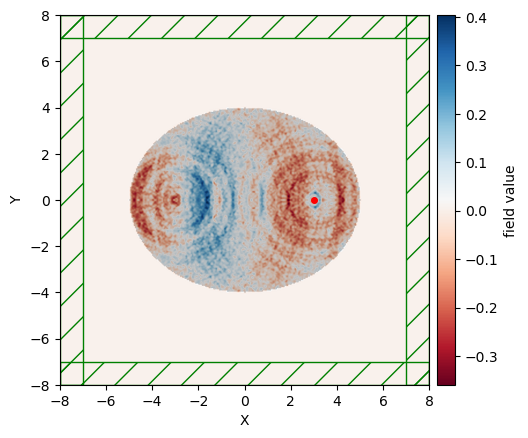

In [8]:
#右焦點；點波源；5/4；無旋轉
import meep as mp
import matplotlib.pyplot as plt
import math

# 設定計算區域大小 (x, y)
cell = mp.Vector3(16, 16, 0)

# 設定邊界及其厚度
pml_layers = [mp.PML(1.0)]

# 設定解析度
resolution = 20

# 橢圓尺寸
a = 5
b = 4

# 完美導體區域
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 空氣橢圓覆蓋金屬
air_ellipse = mp.Ellipsoid(
    size=mp.Vector3(a*2, b*2, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

geometry = [metal_block, air_ellipse]

# 計算橢圓右焦點位置
f = math.sqrt(a**2 - b**2)
focus_point = mp.Vector3(f, 0)

# 建立點波源
sources = [mp.Source(
    src=mp.ContinuousSource(frequency=0.15),
    component=mp.Ez,
    center=focus_point
)]

# 建立模擬物件
sim.reset_meep()
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)
# 執行模擬
sim.run(until=20000)
# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000195026 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     ellipsoid, center = (0,0,0)
          size (12,6,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.14031 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 308.925/20000.0 = 1.5% done in 4.0s, 255.0s to go
on time step 12368 (time=309.2), 0.000323438 s/step
Meep progress: 622.4000000000001/20000.0 = 3.1% done in 8.0s, 249.1s to go
on time step 24912 (time=622.8), 0.000318912 s/step
Meep progress: 933.45/20000.0 = 4.7% done in 12.0s, 245.1s to go
on time step 37359 (time=933.975), 0.000321383 s/step
Meep progress: 1248.075/20000.0 = 6.2% done in 16.0s, 240.4s to go
on time step 49950 (time=1248.75), 0.000317688 s/step
Meep progress: 1559.3000000000002/20000.0 = 7.8% done in 20.0s, 236.5s to go
on time step 62404 (time=1560.1), 0.000321205 s/step
Meep progress: 1870.8000000000002/20000.0 = 9.4% done in 24.0s, 232.6s to go
on time step 74870 (time=1871.75), 0.000320892 s/step
Meep progress: 2182.225/20000.0 = 10.9% done in 28.0s, 228.6s to go
on time step 87332 (time=2183.3), 0.000320999 s/step
Meep progress: 2497.2250000000004/20000.0 = 12.5% done in 32.0s, 224.3s to go
on time step 99937 (time=2498.43), 0.000317342 s/step
Me

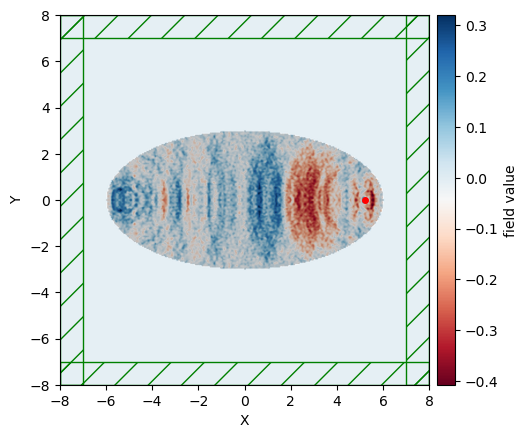

In [9]:
#右焦點；點波源；6/3；無旋轉
import meep as mp
import matplotlib.pyplot as plt
import math

# 設定計算區域大小 (x, y)
cell = mp.Vector3(16, 16, 0)

# 設定邊界及其厚度
pml_layers = [mp.PML(1.0)]

# 設定解析度
resolution = 20

# 橢圓尺寸
a = 6
b = 3

# 完美導體區域
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 空氣橢圓覆蓋金屬
air_ellipse = mp.Ellipsoid(
    size=mp.Vector3(a*2, b*2, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

geometry = [metal_block, air_ellipse]

# 計算橢圓右焦點位置
f = math.sqrt(a**2 - b**2)
focus_point = mp.Vector3(f, 0)

# 建立點波源
sources = [mp.Source(
    src=mp.ContinuousSource(frequency=0.15),
    component=mp.Ez,
    center=focus_point
)]

# 建立模擬物件
sim.reset_meep()
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)
# 執行模擬
sim.run(until=20000)
# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000209093 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     ellipsoid, center = (0,0,0)
          size (12,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.139813 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 319.05/20000.0 = 1.6% done in 4.0s, 246.8s to go
on time step 12772 (time=319.3), 0.000313192 s/step
Meep progress: 638.75/20000.0 = 3.2% done in 8.0s, 242.5s to go
on time step 25567 (time=639.175), 0.000312668 s/step
Meep progress: 959.1750000000001/20000.0 = 4.8% done in 12.0s, 238.2s to go
on time step 38389 (time=959.725), 0.000311984 s/step
Meep progress: 1277.825/20000.0 = 6.4% done in 16.0s, 234.4s to go
on time step 51139 (time=1278.48), 0.000313742 s/step
Meep progress: 1596.4250000000002/20000.0 = 8.0% done in 20.0s, 230.6s to go
on time step 63889 (time=1597.23), 0.000313729 s/step
Meep progress: 1915.8000000000002/20000.0 = 9.6% done in 24.0s, 226.6s to go
on time step 76668 (time=1916.7), 0.000313019 s/step
Meep progress: 2236.375/20000.0 = 11.2% done in 28.0s, 222.4s to go
on time step 89496 (time=2237.4), 0.000311836 s/step
Meep progress: 2557.375/20000.0 = 12.8% done in 32.0s, 218.3s to go
on time step 102343 (time=2558.58), 0.000311377 s/step
Meep progr

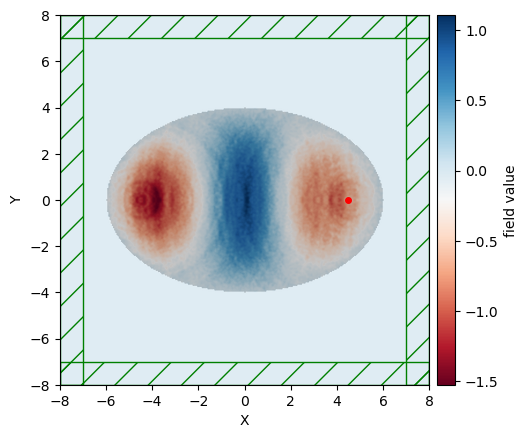

In [10]:
#右焦點；點波源；6/4；無旋轉
import meep as mp
import matplotlib.pyplot as plt
import math

# 設定計算區域大小 (x, y)
cell = mp.Vector3(16, 16, 0)

# 設定邊界及其厚度
pml_layers = [mp.PML(1.0)]

# 設定解析度
resolution = 20

# 橢圓尺寸
a = 6
b = 4

# 完美導體區域
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 空氣橢圓覆蓋金屬
air_ellipse = mp.Ellipsoid(
    size=mp.Vector3(a*2, b*2, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

geometry = [metal_block, air_ellipse]

# 計算橢圓右焦點位置
f = math.sqrt(a**2 - b**2)
focus_point = mp.Vector3(f, 0)

# 建立點波源
sources = [mp.Source(
    src=mp.ContinuousSource(frequency=0.15),
    component=mp.Ez,
    center=focus_point
)]

# 建立模擬物件
sim.reset_meep()
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)
# 執行模擬
sim.run(until=20000)
# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000203848 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     ellipsoid, center = (0,0,0)
          size (10,6,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.136458 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 317.725/20000.0 = 1.6% done in 4.0s, 247.8s to go
on time step 12719 (time=317.975), 0.000314492 s/step
Meep progress: 634.6/20000.0 = 3.2% done in 8.0s, 244.1s to go
on time step 25401 (time=635.025), 0.000315428 s/step
Meep progress: 946.625/20000.0 = 4.7% done in 12.0s, 241.5s to go
on time step 37886 (time=947.15), 0.000320406 s/step
Meep progress: 1263.125/20000.0 = 6.3% done in 16.0s, 237.4s to go
on time step 50552 (time=1263.8), 0.00031583 s/step
Meep progress: 1580.025/20000.0 = 7.9% done in 20.0s, 233.2s to go
on time step 63233 (time=1580.83), 0.000315458 s/step
Meep progress: 1892.5500000000002/20000.0 = 9.5% done in 24.0s, 229.6s to go
on time step 75738 (time=1893.45), 0.000319892 s/step
Meep progress: 2206.0750000000003/20000.0 = 11.0% done in 28.0s, 225.9s to go
on time step 88285 (time=2207.12), 0.000318803 s/step
Meep progress: 2519.275/20000.0 = 12.6% done in 32.0s, 222.0s to go
on time step 100818 (time=2520.45), 0.000319177 s/step
Meep progress: 2836

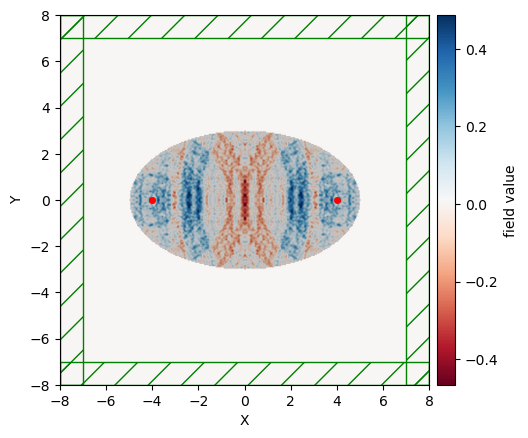

In [11]:
#左右焦點；點波源；5/3；無旋轉
import meep as mp
import matplotlib.pyplot as plt
import math

# 設定計算區域大小 (x, y)
cell = mp.Vector3(16, 16, 0)

# 設定邊界及其厚度
pml_layers = [mp.PML(1.0)]

# 設定解析度
resolution = 20

# 橢圓尺寸
a = 5
b = 3

# 完美導體區域
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 空氣橢圓覆蓋金屬
air_ellipse = mp.Ellipsoid(
    size=mp.Vector3(a*2, b*2, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

geometry = [metal_block, air_ellipse]

# 計算橢圓焦點位置
f = math.sqrt(a**2 - b**2)
right_focus = mp.Vector3(f, 0)
left_focus = mp.Vector3(-f, 0)

# 建立兩個點波源（左右焦點）
sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=right_focus
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=left_focus
    )
]

# 建立模擬物件
sim.reset_meep()
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)
# 執行模擬
sim.run(until=20000)
# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000198126 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     ellipsoid, center = (0,0,0)
          size (10,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.142768 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 310.27500000000003/20000.0 = 1.6% done in 4.0s, 253.8s to go
on time step 12422 (time=310.55), 0.000322025 s/step
Meep progress: 626.85/20000.0 = 3.1% done in 8.0s, 247.2s to go
on time step 25090 (time=627.25), 0.000315807 s/step
Meep progress: 940.1/20000.0 = 4.7% done in 12.0s, 243.3s to go
on time step 37626 (time=940.65), 0.000319088 s/step
Meep progress: 1256.4/20000.0 = 6.3% done in 16.0s, 238.7s to go
on time step 50283 (time=1257.08), 0.000316049 s/step
Meep progress: 1569.65/20000.0 = 7.8% done in 20.0s, 234.8s to go
on time step 62819 (time=1570.48), 0.000319099 s/step
Meep progress: 1884.6750000000002/20000.0 = 9.4% done in 24.0s, 230.7s to go
on time step 75424 (time=1885.6), 0.000317347 s/step
Meep progress: 2197.5750000000003/20000.0 = 11.0% done in 28.0s, 226.8s to go
on time step 87945 (time=2198.62), 0.000319473 s/step
Meep progress: 2511.8/20000.0 = 12.6% done in 32.0s, 222.8s to go
on time step 100519 (time=2512.98), 0.000318122 s/step
Meep progress: 

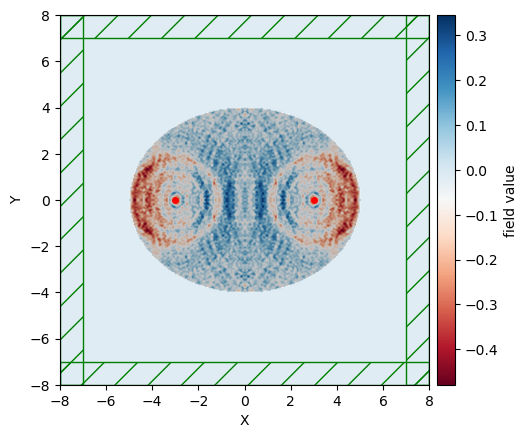

In [12]:
#左右焦點；點波源；5/4；無旋轉
import meep as mp
import matplotlib.pyplot as plt
import math

# 設定計算區域大小 (x, y)
cell = mp.Vector3(16, 16, 0)

# 設定邊界及其厚度
pml_layers = [mp.PML(1.0)]

# 設定解析度
resolution = 20

# 橢圓尺寸
a = 5
b = 4

# 完美導體區域
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 空氣橢圓覆蓋金屬
air_ellipse = mp.Ellipsoid(
    size=mp.Vector3(a*2, b*2, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

geometry = [metal_block, air_ellipse]

# 計算橢圓焦點位置
f = math.sqrt(a**2 - b**2)
right_focus = mp.Vector3(f, 0)
left_focus = mp.Vector3(-f, 0)

# 建立兩個點波源（左右焦點）
sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=right_focus
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=left_focus
    )
]

# 建立模擬物件
sim.reset_meep()
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)
# 執行模擬
sim.run(until=20000)
# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000200033 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     ellipsoid, center = (0,0,0)
          size (12,6,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.137828 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 314.90000000000003/20000.0 = 1.6% done in 4.0s, 250.1s to go
on time step 12607 (time=315.175), 0.000317288 s/step
Meep progress: 629.875/20000.0 = 3.1% done in 8.0s, 246.0s to go
on time step 25211 (time=630.275), 0.00031737 s/step
Meep progress: 944.475/20000.0 = 4.7% done in 12.0s, 242.1s to go
on time step 37800 (time=945), 0.000317752 s/step
Meep progress: 1260.25/20000.0 = 6.3% done in 16.0s, 237.9s to go
on time step 50436 (time=1260.9), 0.000316559 s/step
Meep progress: 1574.65/20000.0 = 7.9% done in 20.0s, 234.0s to go
on time step 63016 (time=1575.4), 0.000317968 s/step
Meep progress: 1891.15/20000.0 = 9.5% done in 24.0s, 229.8s to go
on time step 75682 (time=1892.05), 0.000315817 s/step
Meep progress: 2208.475/20000.0 = 11.0% done in 28.0s, 225.6s to go
on time step 88377 (time=2209.43), 0.00031509 s/step
Meep progress: 2525.4/20000.0 = 12.6% done in 32.0s, 221.4s to go
on time step 101060 (time=2526.5), 0.000315388 s/step
Meep progress: 2843.15/20000.0 = 14.2

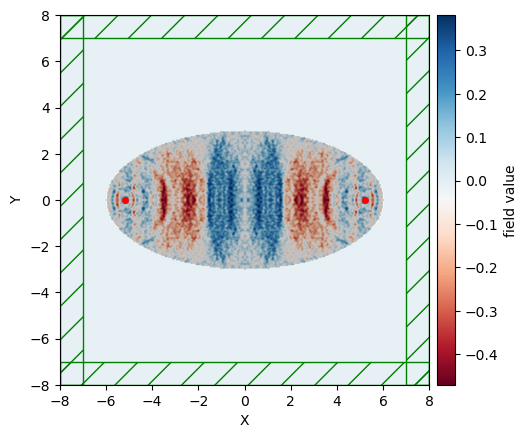

In [13]:
#左右焦點；點波源；6/3；無旋轉
import meep as mp
import matplotlib.pyplot as plt
import math

# 設定計算區域大小 (x, y)
cell = mp.Vector3(16, 16, 0)

# 設定邊界及其厚度
pml_layers = [mp.PML(1.0)]

# 設定解析度
resolution = 20

# 橢圓尺寸
a = 6
b = 3

# 完美導體區域
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 空氣橢圓覆蓋金屬
air_ellipse = mp.Ellipsoid(
    size=mp.Vector3(a*2, b*2, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

geometry = [metal_block, air_ellipse]

# 計算橢圓焦點位置
f = math.sqrt(a**2 - b**2)
right_focus = mp.Vector3(f, 0)
left_focus = mp.Vector3(-f, 0)

# 建立兩個點波源（左右焦點）
sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=right_focus
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=left_focus
    )
]

# 建立模擬物件
sim.reset_meep()
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)
# 執行模擬
sim.run(until=20000)
# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000198841 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 20
     block, center = (0,0,0)
          size (16,16,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     ellipsoid, center = (0,0,0)
          size (12,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.126507 s
-----------


FloatProgress(value=0.0, description='0% done ', max=20000.0)

Meep progress: 313.20000000000005/20000.0 = 1.6% done in 4.0s, 251.4s to go
on time step 12539 (time=313.475), 0.000319013 s/step
Meep progress: 629.0/20000.0 = 3.1% done in 8.0s, 246.4s to go
on time step 25175 (time=629.375), 0.000316558 s/step
Meep progress: 939.225/20000.0 = 4.7% done in 12.0s, 243.5s to go
on time step 37590 (time=939.75), 0.000322195 s/step
Meep progress: 1251.25/20000.0 = 6.3% done in 16.0s, 239.8s to go
on time step 50075 (time=1251.88), 0.000320411 s/step
Meep progress: 1565.65/20000.0 = 7.8% done in 20.0s, 235.5s to go
on time step 62659 (time=1566.48), 0.000317902 s/step
Meep progress: 1878.375/20000.0 = 9.4% done in 24.0s, 231.5s to go
on time step 75173 (time=1879.33), 0.000319644 s/step
Meep progress: 2195.0750000000003/20000.0 = 11.0% done in 28.0s, 227.1s to go
on time step 87846 (time=2196.15), 0.00031564 s/step
Meep progress: 2510.1000000000004/20000.0 = 12.6% done in 32.0s, 223.0s to go
on time step 100453 (time=2511.33), 0.000317317 s/step
Meep prog

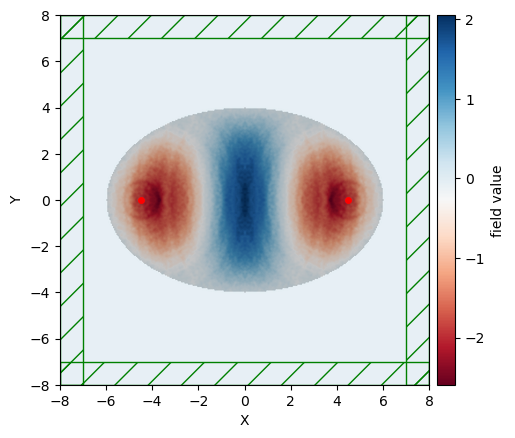

In [14]:
#左右焦點；點波源；6/4；無旋轉
import meep as mp
import matplotlib.pyplot as plt
import math

# 設定計算區域大小 (x, y)
cell = mp.Vector3(16, 16, 0)

# 設定邊界及其厚度
pml_layers = [mp.PML(1.0)]

# 設定解析度
resolution = 20

# 橢圓尺寸
a = 6
b = 4

# 完美導體區域
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 空氣橢圓覆蓋金屬
air_ellipse = mp.Ellipsoid(
    size=mp.Vector3(a*2, b*2, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

geometry = [metal_block, air_ellipse]

# 計算橢圓焦點位置
f = math.sqrt(a**2 - b**2)
right_focus = mp.Vector3(f, 0)
left_focus = mp.Vector3(-f, 0)

# 建立兩個點波源（左右焦點）
sources = [
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=right_focus
    ),
    mp.Source(
        src=mp.ContinuousSource(frequency=0.15),
        component=mp.Ez,
        center=left_focus
    )
]

# 建立模擬物件
sim.reset_meep()
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)
# 執行模擬
sim.run(until=20000)
# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()


#右焦點；點波源；6/3；無旋轉
import meep as mp
import matplotlib.pyplot as plt
import math

# 設定計算區域大小 (x, y)
cell = mp.Vector3(16, 16, 0)

# 設定邊界及其厚度
pml_layers = [mp.PML(1.0)]

# 設定解析度
resolution = 20

# 橢圓尺寸
a = 6
b = 3

# 完美導體區域
metal_block = mp.Block(
    size=mp.Vector3(16, 16, mp.inf),
    material=mp.metal
)

# 空氣橢圓覆蓋金屬
air_ellipse = mp.Ellipsoid(
    size=mp.Vector3(a*2, b*2, mp.inf),
    material=mp.air,
    center=mp.Vector3(0, 0)
)

geometry = [metal_block, air_ellipse]

# 計算橢圓右焦點位置
f = math.sqrt(a**2 - b**2)
focus_point = mp.Vector3(f, 0)

# 建立點波源
sources = [mp.Source(
    src=mp.ContinuousSource(frequency=0.15),
    component=mp.Ez,
    center=focus_point
)]

# 建立模擬物件
sim.reset_meep()
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    dimensions=2
)
# 執行模擬
sim.run(until_after_sources=mp.stop_after_walltime(10))

# 繪製電場
sim.plot2D(fields=mp.Ez,
           field_parameters={'colorbar': True, 'cmap' : 'RdBu'}
          )
plt.show()
